# $\TeX$ Preamble
$$
\def\M#1{{[\mathbf{#1}]}}
\def\MM#1#2{{[\mathbf{#1}{#2}]}}
\def\E{\mathbb{E}}
\def\f{\operatorname{f}}
\def\cov{\operatorname{cov}}
\def\T{^\mathsf{T}}
$$


In [ ]:
#Python Preamble
#!pip install ipympl
#from google.colab import output
#output.enable_custom_widget_manager()
#%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

# Random Variable
I think that this concept is misnamed -- whenever I see "random variable", I think "random experiment".

The idea is that a random variable models a random process -- a process that you can repeat at will, and draw actual outcomes from. Strictly speaking, a random process is just some process which will spit out an unknown result, and a random variable is a pairing of a random process with a method for converting the outcomes to numerical values. For instance, a pair of dice is a random process: You can roll the dice and get an outcome whenever you want, but you can't predict the outcome. Adding together the numbers on the top of the dice assigns each outcome a value. So the combination of the dice and the rule for assigning values to dice outcomes makes a random variable.

There can also be continuous random variables -- think a roulette wheel with no slots. The value might be assigned by measuring the angle from where the ball comes to rest relative to some reference mark, but since there are no slots, it could have any value in the continuous range $[0^\circ, 360^\circ)$

The reason we use random variables is that now we can do math on them -- if we have both the dice and the wheel, we can talk about a random variable that is the sum of the two input random variables. We are already doing that in fact with the pair of dice. The value on top of each die is a random variable, and the value of them both is the sum of the value of each.

We are not limited to addition -- any operation you can perform on a number, you can perform on a random variable. Any operation you can perform on a pair of numbers, you can perform on a pair of random variables.

Note that any particular outcome of a random variable is no longer random. It has a known definite value.

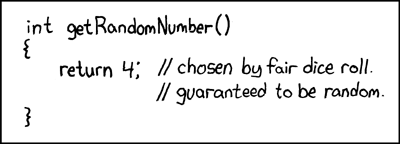

Figure 1. Confusing a random variable with one of its outcomes. From [XKCD](https://xkcd.com/221/)

A random variable on the other hand does not have a value.



We typically name a random variable something like $X$, and one (possible) outcome of the variable as $x$.

We use the concept of *probability* to model the combination of random processes in mathematics. This allows us to do such simple things as predict what values of a random variable are more or less likely to occur. Running with it further, it allows such things as the Kalman filter.

# Probability desnity funciton
A random variable by itself is not really possible to enclose in mathematics -- math is ideal, exact, and in some sense constant. Random variables are the opposite of all of these things. So, we try to capture the nature of the random variable using the *probability density function* (PDF). We say that a random variable $X$ has a PDF $f_X(x)$ This function has the following properties:

* It has a positive value for each possible outcome of the random variable. For the fullest possible generality, the domain of the probability density function is any real number, but the PDF is zero at outcomes that cannot happen.
* Its integral over any range of outcomes is the probability that the random variable will return an outcome in that range. In other words, the *area* under a section of the curve is proportional to the *probability* of that section. (Note that this means that for a discrete random variable, the PDF is a train of scaled Dirac impulse functions.) $$p(a\le X\le b)=\int_a^b f_X(x)\,dx$$
* Its integral over the domain of the function is exactly 1.0, since this represents certainty, and whenever you exercise a random variable, you are guaranteed *some* outcome. With the infinite domain discussed above, we have: $$\int_{-\infty}^\infty f_X(x)\,dx=1$$

For a continuous random variable, the value of the PDF at any point is the probability of the variable coming out in some small subdomain around that point, divided by the width of the subdomain, as the width of the subdomain goes to zero. It pretty much has the same interpretation as any thin rectangle in any visualization you have seen of the Riemann sum.

# Joint probability density
A problem may have more than one random variable. For instance, suppose we have two distinguishable (maybe by different colors) dice, and roll them at the same time. Each die has a PDF, but we can ask questions about the *joint* probability. For instance, what is the probability that the red die lands on 1 and the green die lands on 4? Similarly for continuous random variables, say two spinners labeled from 0 to 1, we can ask what is the probability that the blue spinner lands between 0.1 and 0.2, and that the yellow spinner lands between 0.3 and 0.4. We would write the probability density of $X$ coming out $x$ *AND* $Y$ coming out $y$ as $\f_{X,Y}(x,y)$. This is the joint probability density function (joint PDF).



# Dependence
Often the variables have no influence on each other. We assume that the PDF of the green die doesn't depend on the outcome of the red die. No matter whether we get 1, 4, or 6 on the red die, the probability of getting 5 on the green die remains 1/6. This intuitively is what we mean by *independent*. If the dice are six-sided and fair, the probability of each outcome of each die is 1/6, and the probability of any particular outcome on one *AND* a particular value on the other is 1/36.

On the other hand, we might assign values to the same experiment in different ways. We might define random variable $X$ as being a fair coin flip, with the outcome heads being assigned the value 0 and the value tails being assigned the value 1. Now define random variable $Y$ as the *exact same coin flip*, with the outcome heads being assigned the value 1 and the value tails being assigned the value 0. To generate an outcome of $X$, we flip the coin then assign the value. We get a value for $Y$ *without perfoming the experiment again*, and just using the outcome-to-value lookup for it. If we got heads, we know that $X=1$. And if we know that $X=1$, then we know with absolute certainty that $Y=0$. These variables are *completely dependent*, although in a somewhat contrived way. Note that this means that if you have a random variable $X$ and another random variable defined as a function of the first, like $Y=X+4$, $Y=aX$, or in general $Y=\operatorname{g}(X)$, then $Y$ is completely dependent on $X$. If you know the value of $X$, you can calculate the value of $Y$ with 100% certainty.

It's possible to have less than complete dependence. When playing with toys, boys are more likely to like trucks, and girls are more likely to prefer dolls. However, each child is an individual -- some girls prefer trucks, and some boys prefer dolls. To be concrete, in a school with 100 children, exactly 50 are boys and 50 are girls. Of the 50 boys, 40 prefer trucks, and of the 50 girls, 40 prefer dolls. If I were to pick a child at random, the chance that this child prefers trucks is 50%, because 50% of the children at the school prefer trucks. But if we happened to pick a girl, we can now say that there is only a 20% chance that she prefers trucks. If getting a particular outcome of one random variable affects the PDF of another, then those two variables are at least *partially dependent*.

Inspired by the above, we can mathematically define dependence or independence as follows: If two variables $X$ and $Y$ have PDFs $\f_X(x)$ and $\f_Y(y)$, and a joint PDF $\f_{X,Y}(x,y)$, the variables are *independent* if and only if $\f_{X,Y}(x,y)=\f_X(x)\f_Y(y)$, and at least partially *dependent* otherwise. Usually we divide the world into two groups -- independent and any degree of dependence, without trying to quantify the amount of dependence. It is conventional to write "independent" or "not independent", but I hate double-negatives, so I will write "independent" or "dependent". If I need to distinguish complete or partial dependence, I will write one of those.

Now let's look at our two examples, and see what this definition says about them. For the dice, the probability of getting a red 5 and a green 3 is $\f_{X,Y}(5,3)=1/36$. This exactly equals $\f_X(5)\f_Y(3)=(1/6)(1/6)=1/36$. This is true for *any* pair of outcomes, so the variables are independent.

Conversely for the boys and girls, we have $\f_X(\mbox{boy})=50/100$ and $\f_Y(\mbox{doll})=50/100$, but $\f_{X,Y}(\mbox{boy},\mbox{truck})=40/100=2/5$ which is wildly different from:

$$\begin{eqnarray*}
\f_X(\mbox{boy})\f_Y(\mbox{truck})&=&(50/100)(50/100) \\
 &=&(1/2)(1/2) \\
 &=&1/4
\end{eqnarray*}$$

so the variables $X$ and $Y$ are dependent.

Note that it isn't enough to know the expected values, covariances, or any other summary statistic of the two variables. The full PDF of each variable as well as the full joint PDF of the two variables together is needed to determine dependence.

## Visual joint probability
Suppose you make a table (for discrete variables) or 2D field (for continuous variables). If the variables are independent, then each row of the table or horizontal cross section of the field is a scaled copy of any other, and similarly each column or vertical cross section is a scaled copy of any other. We can get this directly from the definition of independence:

$$\begin{eqnarray*}
\f_X(x)\f_Y(y)&=&\f_{X,Y}(x,y)
\end{eqnarray*}$$

Looking at either of the variables (say $X$), we select one outcome for the other (say $y$). Then $\f_Y(y)$ is a known value and acts like a coefficient for $\f_X(x)$ to get $\f_{X,Y}(x,y)$.

Visually and intuitively, I would describe this as "plaid". Each row is brighter or dimmer than the other rows, but all rows have the same "shape" along them, and similarly for the columns. Let's look at the ones we have seen so far:

red\green         1          2          3          4          5          6
    1           1/36.0     1/36.0     1/36.0     1/36.0     1/36.0     1/36.0
    2           1/36.0     1/36.0     1/36.0     1/36.0     1/36.0     1/36.0
    3           1/36.0     1/36.0     1/36.0     1/36.0     1/36.0     1/36.0
    4           1/36.0     1/36.0     1/36.0     1/36.0     1/36.0     1/36.0
    5           1/36.0     1/36.0     1/36.0     1/36.0     1/36.0     1/36.0
    6           1/36.0     1/36.0     1/36.0     1/36.0     1/36.0     1/36.0
(6, 1)
(1, 6)
(6, 1)
(1, 6)
[[36. 36. 36. 36. 36. 36.]
 [36. 36. 36. 36. 36. 36.]
 [36. 36. 36. 36. 36. 36.]
 [36. 36. 36. 36. 36. 36.]
 [36. 36. 36. 36. 36. 36.]
 [36. 36. 36. 36. 36. 36.]]


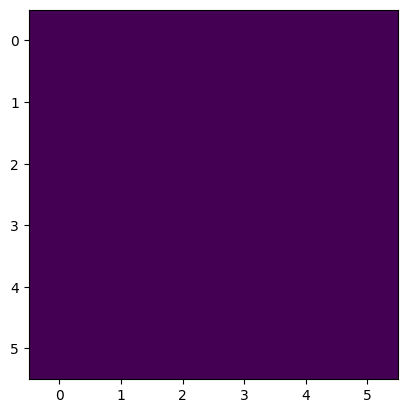

In [ ]:
# Discrete joint probability density with uniform random variables (fair dice)

"""
Note that we don't even need a PRNG for this cell


# Set up a pseudorandom number generator. Use a constant seed so that we get the
# same sequence of pseudorandom numbers each time.
import numpy.random as nr
rng=np.random.default_rng(3217)


"""

def f_red(redval:int)->float:
    """
    Probability density function for red die. This answers the question
    "what is the probability of getting the outcome `redval`?" for any
    `redval`
    """
    #Note that this doesn't depend on the input. The probability density is
    #constant, no matter what outcome we ask about
    result=1.0/6.0
    try:
        return result*np.ones(redval.shape)
    except Exception:
        return result


def f_green(greenval:int)->float:
    """
    PDF for green die. It's the same PDF as f_red(), but that doesn't
    mean that the green die and red die are dependent, just that they
    have the same odds. Rolling a 5 on the red die doesn't tell you
    anything about what the green die will turn up
    """
    result=1.0/6.0
    try:
        return result*np.ones(greenval.shape)
    except Exception:
        return result


def f_redgreen(redval:int,greenval:int)->float:
    """
    Get joint probability function, which answers the question "what
    is the probability of rolling both dice and getting `redval` on
    the red one *AND* `greenval` on the green one.
    """
    #Since these two variables are independent, we can just
    #multiply each probability
    return f_red(redval)*f_green(greenval)


print(fr"red\green"+" ".join([f"{x:10d}" for x in range(1,7)]))
for redval in range(1,7):
    print(f"    {redval:1d}       "+" ".join([f"    1/{1/f_redgreen(redval,greenval):4.1f}" for greenval in range(1,7)]))


redvals,greenvals=np.ogrid[1:7,1:7]
print(redvals.shape)
print(greenvals.shape)
print(f_red(redvals).shape)
print(f_green(greenvals).shape)
print(1.0/f_redgreen(redvals,greenvals))
plt.figure("Fair dice")
plt.imshow(f_redgreen(redvals,greenvals))
plt.show()

In [ ]:
# Discrete joint probability density with non-uniform random variables (loaded dice)

"""
Note that we don't even need a PRNG for this cell


# Set up a pseudorandom number generator. Use a constant seed so that we get the
# same sequence of pseudorandom numbers each time.
import numpy.random as nr
rng=np.random.default_rng(3217)


"""

def f_red_loaded(redval:int)->float:
    """
    Probability density function for red die. This answers the question
    "what is the probability of getting the outcome `redval`?" for any
    `redval`
    """
    #Note that this doesn't depend on the input. The probability density is
    #constant, no matter what outcome we ask about
    result=redval*0
    result[redval==3]=1.0/2.0
    result[redval!=3]=0.5/5.0     #remaining 5 values equally share 50% of total PDF
        return result*np.ones(redval.shape)
    except Exception:
        return result


def f_green_loaded(greenval:int)->float:
    """
    PDF for green die. It's the same PDF as f_red(), but that doesn't
    mean that the green die and red die are dependent, just that they
    have the same odds. Rolling a 5 on the red die doesn't tell you
    anything about what the green die will turn up
    """
    if greenval==2 or greenval==5:
        result=1.0/3.0 #This uses up 2/3 of PDF
    else:
        result=(1.0/3.0)/4.0 #Remaining 4 outcomes share 1/3 of PDF
    try:
        return result*np.ones(greenval.shape)
    except Exception:
        return result


def f_redgreen_loaded(redval:int,greenval:int)->float:
    """
    Get joint probability function, which answers the question "what
    is the probability of rolling both dice and getting `redval` on
    the red one *AND* `greenval` on the green one.
    """
    #Since these two variables are independent, we can just
    #multiply each probability
    return f_red_loaded(redval)*f_green_loaded(greenval)


print(fr"red\green"+" ".join([f"{x:10d}" for x in range(1,7)]))
for redval in range(1,7):
    print(f"    {redval:1d}       "+" ".join([f"    1/{1/f_redgreen_loaded(redval,greenval):4.1f}" for greenval in range(1,7)]))


redvals,greenvals=np.ogrid[1:7,1:7]
print(redvals.shape)
print(greenvals.shape)
print(f_red_loaded(redvals).shape)
print(f_green_loaded(greenvals).shape)
print(1.0/f_redgreen_loaded(redvals,greenvals))
plt.figure("Loaded dice")
plt.imshow(f_redgreen_loaded(redvals,greenvals))
plt.show()

red\green         1          2          3          4          5          6
    1           1/120.0     1/30.0     1/120.0     1/120.0     1/30.0     1/120.0
    2           1/120.0     1/30.0     1/120.0     1/120.0     1/30.0     1/120.0
    3           1/24.0     1/ 6.0     1/24.0     1/24.0     1/ 6.0     1/24.0
    4           1/120.0     1/30.0     1/120.0     1/120.0     1/30.0     1/120.0
    5           1/120.0     1/30.0     1/120.0     1/120.0     1/30.0     1/120.0
    6           1/120.0     1/30.0     1/120.0     1/120.0     1/30.0     1/120.0
(6, 1)
(1, 6)


ValueError: ignored

# Vector random variable
You can group a series of random variables into a single vector. For an $nD$ vector random variable, you talk about its probability density function as having a non-negative value at any point in $nD$ space. Here we don't think about the "height" of the variable above the axis, but rather its "density". The probability of the random variable producing any particular value in a volume of space $S$ is:

$$\int_S f_\vec{X}(\vec{x})\,ds$$

For instance, with a 3D cartesian vector random variable, you have:

$$\iiint_S f_X(x,y,z)\,dx\,dy\,dz$$

The value of the function at any particular point is the probability that the outcome will be in a small volume around that point, divided by the volume, as the volume approaches zero.

An outcome of a random variable $\vec{X}$ will often be called $\vec{x}$. If it is a 3D vector and makes sense to talk about in a Cartesian sense, we will call the components $x_\hat{i}=x_x$, $x_\hat{j}=x_y$, and $x_\hat{k}=x_z$

If we are talking coordinates, we will need a basis basis. In the specific 3D case, we might talk about basis vectors $\hat{i}$, $\hat{j}$, $\hat{k}$. In the general $n$D case, we will call them $\hat{\beta}_i$ for dimension $i$.

## Dependence
The components of the vector random variable can depend on each other -- IE the probability density of some components may depend on the outcomes of other components. For instance, imagine a 3D probability density. Each point has a particular density, as if it were matter with a particular mass density. Some points may be more dense than others, but the total mass is 1.0. If you fix two of the components of the vector outcome, what is left is a line through the volume along the axis that is left. Suppose you want to know about the probability of a random variable $\vec{X}$ when you already know that the outcomes of $x_\hat{i}$ is 2 and $x_\hat{j}$ is 3. The only thing that hasn't come out yet is $x_\hat{k}$. This component is itself a random variable with a probability density that you can find by slicing the density function along the line $(2,3,z)$ and scaling appropriately such that the integral along the whole line is 1.0.

If this function along the line is the same no matter what values of $x_\hat{i}$ and $x_\hat{j}$ are, then we say that the $\hat{k}$ component of $\vec{X}$ is *independent* of the other components, otherwise it is *dependent*. Note that dependence or independence can be mutual. If once you know the value of some components, you can calculate other components with perfect certainty, we say that the second components are *completely dependent* on the first. So, dependence is a spectrum -- at one end, you can't say anything about an independent component if you know the others. At the other end, you can calculate with perfect certainty a completely dependent value if you know the others. In the middle, you have more, but not perfect, knowledge of the partially dependent component if you know the others.

# Expected Value
We *define* the expected value of a random variable $\E(X)$ in terms of an integral involving the variable's probability density function $f_X(x)$ as follows:

$$\E(X)=\int_{-\infty}^{\infty} xf_X(x)\,dx$$.

In effect we take the weighted integral, where the $x$ coordinate itself is the weight. This is arbitrary, but matches our intuitive idea as the expected value in some sense being the mean value over the population of outcomes. Note that the expected value of a random variable has a definite non-random value.

## Expected value for vectors

Expectation of a random vector is naturally more complicated. Having been burned by the [law of the unconscious statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician), I always suspect that things that look like definitions are actually theorems, IE the only reasonable complicated result which is consistent with the simpler result.

I've seen just plain stated (without saying whether this was a definition or a theorem) that the expected value of a random vector is the expected value of its components. Given a arbitrary $n$-dimensional random vector as follows:

$$\begin{eqnarray*}
\vec{X}&=&\begin{bmatrix}
X \\
Y \\
Z \\
\vdots \end{bmatrix} \\
&=&\sum \vec{\beta}{i} X_i
\end{eqnarray*}$$

The "definition" is then:

$$
\E(\vec{X})=\sum_i \vec{\beta}_i \E(X_i)
$$

This seems suspicious, because if we went further and

We are going to express this as the sum of scaled basis vectors $\vec{\beta}_i$, partly because that's more generic, but mostly because if a sum occurs in an integral, we can break it up. So, we have:

$$$$



and the PDF of each component will be a function with a scalar output and vector input:

$$\begin{eqnarray*}
\vec{\operatorname{f}}_{\vec{X}}(\vec{v})&=&\begin{bmatrix}
\operatorname{f}_x(\vec{v}) \\
\operatorname{f}_y(\vec{v}) \\
\operatorname{f}_z(\vec{v}) \\
\vdots \end{bmatrix}\\
 &=&\sum \vec{\beta}_i\operatorname{f}_i(\vec{v})
\end{eqnarray*}$$

Now we just drop this into the definition of expectation:

$$\begin{eqnarray*}
\E(\vec{X})&=&\int_{\mathbb{R}^n}\vec{x}\vec{\operatorname{f}}_X(\vec{x})\,d\vec{x}
\end{eqnarray*}$$

And now what? This is cruising towards being an $n^2$ problem, with each component in $\vec{x}$ interacting with each component in $\vec{\operatorname{f}}(\vec{x})$. Plus, what kind of vector multiplication is that? A dot product? A cross product? Something else? We know we can't use the cross product, because that only works in 3- and 7-dimensional space, and we want this to work with in any dimension. We can't use dot product, because that would leave a scalar, and the expected value of a random vector must be a vector. This leaves something else. Without much rigor or reason other than it matches the conventional definition, I choose to use element-by-element multiplication. Each element component of the product is the product of the corresponding components of the factors:

 $$\vec{x}\vec{y}=\sum_i \vec{\beta}_i x_i y_i$$

This has no cross-terms, so the problem scale is still $n$ and not $n^2$.

$$\begin{eqnarray*}
\E(\vec{X})&=&\int_{\mathbb{R}^n}\vec{x}\vec{\operatorname{f}}_X(\vec{x})\,d\vec{x} \\
 &=&\int_{\mathbb{R}^n}\sum_i \vec{\beta}_i x_i\operatorname{f}_i(\vec{x})\,d\vec{x} \\
 &=&\sum_i \int_{\mathbb{R}^n}\vec{\beta}_i x_i\operatorname{f}_i(\vec{x})\,d\vec{x} \\
 &=&\sum_i \vec{\beta}_i\int_{\mathbb{R}^n} x_i\operatorname{f}_i(\vec{x})\,d\vec{x} \\
 &=&\sum_i \vec{\beta}_i\E(x_i) \\
\end{eqnarray*}$$

That last definition still isn't completely comfortable, since on the second-to-last line we have an integration over $n$-dimensional space, and on the last line we treat that as matching the definition of expectation on a 1-dimensional space.


## Properties of Expected Values

### Functions of random variables

We can talk about the expected value of an operation on a random variable. For instance:

$$\E(X^2)=\int_{-\infty}^{\infty} x^2f_X(x)\,dx$$

or in general:

$$\E(g(X))=\int_{-\infty}^{\infty} g(x)f_X(x)\,dx$$

Note that we apply the function to the weight, not the input to the PDF. This is a theorem, not merely a definition, and is referred to as the [Law of the Unconscious Statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician) referring to those poor unfortunate souls (like me) who thought it was merely a definition. We can crib this straight from this page:

#### Proof

For a continuous random variable $X$, define another random variable $Y = g(X)$, and suppose that $g$ is differentiable and that its inverse $g^{-1}$ is monotonic. By the formula for inverse functions and differentiation,

$$\frac{d}{dy}(g^{-1}(y)) = \frac{1}{g^{\prime}(g^{-1}(y))}$$

Because $x = g^{-1}(y)$,

$$dx = \frac{1}{g^{\prime}(g^{-1}(y))}dy$$

So that by a change of variables,

$$\int_{-\infty}^\infty g(x)f_X(x) \, dx = \int_{-\infty}^\infty yf_X(g^{-1}(y))\frac{1}{g^\prime(g^{-1}(y))} \, dy$$

Now, notice that because the cumulative distribution function $F_Y(y) = P(Y \leq y)$, substituting in the value of $g(X)$, taking the inverse of both sides, and rearranging yields $F_Y(y) = F_X(g^{-1}(y))$. Then, by the chain rule,

$$f_Y(y) = f_X(g^{-1}(y))\frac{1}{g^\prime(g^{-1}(y))}$$

Combining these expressions, we find:

$$\int_{-\infty}^\infty g(x)f_X(x) \, dx = \int_{-\infty}^\infty yf_Y(y) \, dy$$

By the definition of expected value,

$$\E[g(X)] = \int_{-\infty}^\infty g(x)f_X(x) \, dx$$

### Non-random variables
If you consider a non-random value *as* a random variable, the only possible outcome is that non-random value. The PDF still needs an output for all possible inputs, and still needs to satisfy the 100% probability when integrated.

Therefore the PDF is $f_k(x)=\delta(x-k)$. Integrating this over all values gives 1 (property of $\delta(x-k)$) and the value is zero at all values other than $k$. Now *at* $x=k$, you need $p_k(x)=\infty$, but we have seen delta-functions before so we are prepared to see this.

Plugging this into the definition of $\E(k)$ gives us:

$$\begin{eqnarray*}
\E(k)&=&\int_{-\infty}^{\infty}kf_k(x)\,dx \\
  &=&\int_{-\infty}^{\infty}k\delta(x-k)\,dx \\
  &=&k\int_{-\infty}^{\infty}\delta(x-k)\,dx \\
  &=&k(1) \\
\end{eqnarray*}$$

So as we would expect, the expected value of a non-random value is that value.

### Scaling
Since you can do math on a random variable, one of the things we can do is multiply it by a non-random value. Naively, we would expect the expected value to just be the expected value of the random variable multiplied by the non-random value. Let's check:

$$\begin{eqnarray*}
\E(kX)&=&\int_{-\infty}^{\infty}kxf_X(x)\,dx \\
  &=&k\int_{-\infty}^{\infty}xf_X(x-k)\,dx \\
  &=&k\E(X) \\
\end{eqnarray*}$$

### Addition
If you add two random variables, you get a third, and it makes sense to ask about the expected value of the sum. I'm not even sure how to express this in terms of the definition integral (I suppose it would go like the unconscious statistician above) but the result is:

$$\begin{eqnarray*}
Z&=&X+Y \\
\E(Z)&=&\E(X+Y) \\
 &=&\E(X)+\E(Y)
\end{eqnarray*}$$

Note that this is not a principle that can be applied to any two-element operator on random variables. You have to prove it for each case. For instance, in general we may have $\E(XY)\ne \E(X)\E(Y)$.

But, since it is true for addition, then between the addition rule and the scaling rule, we have the linearity property which will become so useful below:

$$\E(aX+bY)=a\E(X)+b\E(Y)$$

#### Proof
Let's take a go at it from reverse -- start with the answer and see what we can mathematically manipulate it to. We want to see if we can reach an integral which makes sense to call $\E(X+Y)$:


$$\begin{eqnarray*}
\E(X)+\E(Y)&=&\int_{-\infty}^{\infty}xf_X(x)\,dx+\int_{-\infty}^{\infty}yf_Y(y)\,dy \\
 &=&\int_{-\infty}^{\infty}xf_X(x)\,dx+\int_{-\infty}^{\infty}xf_Y(x)\,dx & \mbox{Rename bound variable }y\mbox{ to }x\\
 &=&\int_{-\infty}^{\infty}xf_X(x)+xf_Y(x)\,dx & \mbox{Linearity of integration}\\
 &=&\int_{-\infty}^{\infty}x(f_X(x)+f_Y(x))\,dx \\
\end{eqnarray*}$$

This is I think as far as I can proceed in this direction. I'm not really comfortable with adding PDFs, since the sum will not be a PDF, but what can we do?

So, we will really test our knowledge of the law of the unconscious statistician, by starting at the beginning and seeing if we can mee this chain of reasoning in the middle.

For any two random variables $X$ and $Y$, we define another random variable $Z = X+Y$. What can we say about $f_Z$?


For vector variables, we take the expected value of the vector as a vector of expected values of each component. This doesn't seem obvious, in fact it seems *wrong* if the components are dependent on each other. I haven't seen a proof of it.

Any vector random variable $\vec{x}$ has a mean vector $\bar{x}=\operatorname{E}(\vec{x})$ and a covariance matrix $\M{P}$. The mean vector is exactly what it seems. The covariance matrix is a property of a random vector variable and is defined as:

$$\M{P}=\E((\vec{X}-\bar{x})(\vec{X}-\bar{x})\T)$$

The scalar variance is the square of the standard deviation and has units of the square of the units of the scalar variable. Likewise the covariance matrix is the "square" of what you might think of as the standard deviation.

If the random variable is a Gaussian random variable, the mean $\bar{x}$ and covariance $\M P$ completely determines the distribution. For any other distribution, more information will be needed. This property of the Gaussian distribution, along with the central limit theorem, demonstrate why the Gaussian distribution is used so often. The no-higher-information makes it easy, and the central limit theorem makes it accurate.

## Properties of a covariance matrix

Suppose we have a random (but not necessarily Gaussian) vector $\vec{x}$. We carry down the definitions above:

$$\begin{eqnarray*}
\bar{x}&=&\E(\vec{x}) \\
\M {P}&=&\cov(\vec{x}) \\
 &=&\E((\vec{x}-\E(\vec{x}))(\vec{x}-\E(\vec{x}))\T) \\
 &=&\E((\vec{x}-\bar{x})(\vec{x}-\bar{x})\T) \\
\end{eqnarray*}$$

It will be useful to distribute out that last product, mostly so that we can recognize it when we are looking at more complicated expressions, so we can gather and reduce to an expectation later.

$$\begin{eqnarray*}
\cov(\vec{x})&=&\E[(\vec{x}-\E(\vec{x}))(\vec{x}-\E(\vec{x}))\T] \\
 &=&\E[(\vec{x}-\E(\vec{x}))(\vec{x}\T-\E(\vec{x})\T)] \\
 &=&\E[\vec{x}(\vec{x}\T-\E(\vec{x})\T)-\E(\vec{x})(\vec{x}\T-\E(\vec{x})\T)] \\
 &=&\E[\vec{x}\vec{x}\T-\vec{x}\E(\vec{x})\T-\E(\vec{x})\vec{x}\T+\E(\vec{x})\E(\vec{x})\T] \\
\end{eqnarray*}$$

The following properties can be proved:

0. The covariance of a nonrandom vector is zero.
   $$\begin{eqnarray*}
\cov(\vec{k})&=&\E[(\vec{k}-\E[\vec{k}])(\vec{k}-\E[\vec{k}])\T] \\
 &=&\E[(\vec{k}-\vec{k})(\vec{k}-\vec{k})\T] & \mbox{Expectation of non-random variable is itself}\\
 &=&\E[(\vec{0})(\vec{0})\T] \\
 &=&\E[\M{0}] \\
 &=&\M{0} &\mbox{Expectation of non-random variable is itself}\\
   \end{eqnarray*}$$

1. $\M P=\E(\vec{x}\vec{x}\T)-\bar{x}\bar{x}\T$
   $$\begin{eqnarray*}
   \M P&=&\cov(\vec{x})\\
       &=&\E((\vec{x}-\E(\vec{x}))(\vec{x}\T-\E(\vec{x})\T)) \\
       &=&\E((\vec{x}\vec{x}\T-\vec{x}\E(\vec{x})\T-\E(\vec{x})\vec{x}\T+\E(\vec{x})\E(\vec{x})\T) &\mbox{distribute terms}\\
       &=&\E(\vec{x}\vec{x}\T)-\E(\vec{x}\E(\vec{x})\T)-\E(\E(\vec{x})\vec{x}\T)+\E(\E(\vec{x})\E(\vec{x})\T) & \mbox{linearity of }\E\mbox{ operator}\\
       &=&\E(\vec{x}\vec{x}\T)-\E(\vec{x})\E(\vec{x})\T-\E(\vec{x})\E(\vec{x}\T)+\E(\E(\vec{x})\E(\vec{x})\T) & \mbox{linearity, and }\E{\vec{x}}\mbox{ is no longer a random variable}\\
       &=&\E(\vec{x}\vec{x}\T)-\E(\vec{x})\E(\vec{x})\T-\E(\vec{x})\E(\vec{x}\T)+\E(\vec{x})\E(\vec{x})\T & \mbox{Both terms are no longer random}\\
       &=&\E(\vec{x}\vec{x}\T)-\E(\vec{x})\E(\vec{x})\T &\mbox{equal and opposite terms cancel out}\\
       &=&\E(\vec{x}\vec{x}\T)-\bar{x}\bar{x}\T\\
   \end{eqnarray*}$$

2. $\M P$ is positive-semidefinite. This means that $\vec{a}\T\M{P}\vec{a}\ge 0$ for any real vector $\vec{a}$ of the correct size. In a sense this is equivalent to saying that the variance of a scalar distribution must be greater than zero. A diagonal matrix with positive or zero values along the diagonal is positive-semidefinite, and one with all positive values is positive-definite.

3. $\M P$ is symmetric, IE $\M P\T=\M P$

4. For any non-random matrix $\M A$ of the correct size, we have: $\operatorname{cov}(\M A\vec{x})=\M A\M P\M A\T$
$$\begin{eqnarray*}
\cov(\M A\vec{x})&=&\E[(\M A\vec{x}-\E[\M A\vec{x}])(\M A\vec{x}-\E[\M A\vec{x}])\T]\\
 &=&\E[(\M A\vec{x}-\M A\E[\vec{x}])(\M A\vec{x}-\M A\E[\vec{x}])\T]&\mbox{linearity}\\
 &=&\E[\M A(\vec{x}-\E[\vec{x}])(\M A\vec{x}-\M A\E[\vec{x}])\T]&\mbox{Factor out matrix term}\\
 &=&\E[\M A(\vec{x}-\E[\vec{x}])(\vec{x}-\E[\vec{x}])\T\M A\T]&\mbox{Factor out matrix term of transpose, }(\M A\M B)\T=\M B\T\M A\T\\
 &=&\M A\E[(\vec{x}-\E[\vec{x}])(\vec{x}-\E[\vec{x}])\T]\M A\T&\mbox{linearity}\\
 &=&\M A\M P\M A\T&\mbox{Substitute in definition }\M P=\E((\vec{x}-\E(\vec{x}))(\vec{x}\T-\E(\vec{x})\T))\\
\end{eqnarray*}$$ Wikipedia says that if there is a matrix $\M L$ such that $\M C=\M L\T\M D\M L$ then we call $\M C$ [*congruent*](https://en.wikipedia.org/wiki/Matrix_congruence) to $\M D$. I thought I heard this called out as the "similarity transform" but it turns out that [*similarity*](https://en.wikipedia.org/wiki/Matrix_similarity) is a related concept $\M E=\M M^{-1}\M F\M M$ for some $\M M$ means that $\M E$ and $\M F$ are similar. Wikipedia further calls out the transformation $\M E\Leftrightarrow \M M^{-1}\M F\M M$ the "similarity transform". Wikipedia doesn't have a name for the matching concept in congruence, so I shall call this the *congruence transform*. In this case, we can without loss of generality say that $\M C=\M N\M D\M N\T$ where $\M N\T=\M L$ $$ $$Note that we don't say It isn't just $\M A\M P$ since $\M P$ is a covariance, wich matches what we think of in scalar form as variance $\sigma^2$ and not standard-deviation $\sigma$, as it is in the square of the units of $\vec{x}$. If we think about a scalar, we really want $(A\sigma)^2=A^2\sigma^2$ or in matrix form, $\M A^2\M P$. There are many possible ways to express this matrix square, but the math above selects the one where we express $\M A^2 \M P$ as $\M A \M P\M A\T$.

5. The cross-covariance of two random vectors $\vec{x}$ and $\vec{y}$ is defined as: $$\begin{eqnarray*}
\cov(\vec{x},\vec{y})&\equiv&\E[(\vec{x}-\E[\vec{x}])(\vec{y}-\E[\vec{y}])\T] \\
&=&\E[(\vec{x}-\E[\vec{x}])(\vec{y}\T-\E[\vec{y}]\T)]\\
&=&\E[\vec{x}(\vec{y}\T-\E[\vec{y}]\T)-\E[\vec{x}](\vec{y}\T-\E[\vec{y}]\T)]\\
&=&\E[\vec{x}\vec{y}\T-\vec{x}\E[\vec{y}]\T-\E[\vec{x}]\vec{y}\T+\E[\vec{x}]\E[\vec{y}]\T]\\
\end{eqnarray*}$$
   Notice that the two vectors don't need to be the same dimension -- if $\vec{x}$ is $n \times 1$ and $\vec{y}$ is $m \times 1$, the product in the middle is $(n \times 1)(1 \times m)$, which passes the compatibility check and results in a potentially non-square matrix of size $n \times m$. If the two vectors are independent, the cross-covariance will be a zero matrix:
$$\cov(\vec{x},\vec{y})\equiv\M{0}\mbox{ if }\vec{x}\mbox{ and }\vec{y}\mbox{ are independent}$$
   This latter result is not a definition -- it is provable from the definition of independence and expectation.

6. For the sum of two random vectors $\vec{x}$ and $\vec{y}$ with the same dimension, we have:$$\begin{eqnarray*}
\cov(\vec{x}+\vec{y})&=&\E[(\vec{x}-\E[\vec{x}]+\vec{y}-\E[\vec{y}])(\vec{x}-\E[\vec{x}]+\vec{y}-\E[\vec{y}])\T] \\
 &=&\E[(\vec{x}-\E[\vec{x}]+\vec{y}-\E[\vec{y}])(\vec{x}\T-\E[\vec{x}]\T+\vec{y}\T-\E[\vec{y}]\T)]  & \mbox{Distribute the transpose}\\
 &=&\E[\vec{x}(\vec{x}\T-\E[\vec{x}]\T+\vec{y}\T-\E[\vec{y}]\T) & \mbox{Distribute the right side over the left}\\
 & &-\E[\vec{x}](\vec{x}\T-\E[\vec{x}]\T+\vec{y}\T-\E[\vec{y}]\T) \\
 & &+\vec{y}(\vec{x}\T-\E[\vec{x}]\T+\vec{y}\T-\E[\vec{y}]\T) \\
 & &-\E[\vec{y}](\vec{x}\T-\E[\vec{x}]\T+\vec{y}\T-\E[\vec{y}]\T)] \\
 &=&\E[\vec{x}\vec{x}\T-\vec{x}\E[\vec{x}]\T+\vec{x}\vec{y}\T-\vec{x}\E[\vec{y}]\T &\mbox{Distribute the left terms over the right sides}\\
 & &-\E[\vec{x}]\vec{x}\T+\E[\vec{x}]\E[\vec{x}]\T-\E[\vec{x}]\vec{y}\T+\E[\vec{x}]\E[\vec{y}]\T \\
 & &+\vec{y}\vec{x}\T-\vec{y}\E[\vec{x}]\T+\vec{y}\vec{y}\T-\vec{y}\E[\vec{y}]\T \\
 & &-\E[\vec{y}]\vec{x}\T+\E[\vec{y}]\E[\vec{x}]\T-\E[\vec{y}]\vec{y}\T+\E[\vec{y}]\E[\vec{y}]\T]\\
 &=&\E[\vec{x}\vec{x}\T-\vec{x}\E[\vec{x}]\T-\E[\vec{x}]\vec{x}\T+\E[\vec{x}]\E[\vec{x}]\T &\mbox{Terms for }\cov(\vec{x}) \\
 & &+\vec{x}\vec{y}\T-\vec{x}\E[\vec{y}]\T-\E[\vec{x}]\vec{y}\T+\E[\vec{x}]\E[\vec{y}]\T  &\mbox{Terms for }\cov(\vec{x},\vec{y})\\
 & &+\vec{y}\vec{x}\T-\vec{y}\E[\vec{x}]\T-\E[\vec{y}]\vec{x}\T+\E[\vec{y}]\E[\vec{x}]\T  &\mbox{Terms for }\cov(\vec{y},\vec{x})\\
 & &+\vec{y}\vec{y}\T-\vec{y}\E[\vec{y}]\T-\E[\vec{y}]\vec{y}\T+\E[\vec{y}]\E[\vec{y}]\T] &\mbox{Terms for }\cov(\vec{y})\\
 &=&\E[\vec{x}\vec{x}\T-\vec{x}\E[\vec{x}]\T-\E[\vec{x}]\vec{x}\T+\E[\vec{x}]\E[\vec{x}]\T] &\mbox{linearity of expectation} \\
 & &+\E[\vec{x}\vec{y}\T-\vec{x}\E[\vec{y}]\T-\E[\vec{x}]\vec{y}\T+\E[\vec{x}]\E[\vec{y}]\T]  \\
 & &+\E[\vec{y}\vec{x}\T-\vec{y}\E[\vec{x}]\T-\E[\vec{y}]\vec{x}\T+\E[\vec{y}]\E[\vec{x}]\T]  \\
 & &+\E[\vec{y}\vec{y}\T-\vec{y}\E[\vec{y}]\T-\E[\vec{y}]\vec{y}\T+\E[\vec{y}]\E[\vec{y}]\T] \\
 &=&\E[(\vec{x}-\E[\vec{x}])(\vec{x}\T-E[\vec{x}]\T)] &\mbox{Factor} \\
 & &+\E[(\vec{x}-\E[\vec{x}])(\vec{y}\T-\E[\vec{y}]\T)]  \\
 & &+\E[(\vec{y}-\E[\vec{y}])(\vec{x}\T-\E[\vec{x}]\T)]  \\
 & &+\E[(\vec{y}-\E[\vec{y}])(\vec{y}\T-\E[\vec{y}]\T)] \\
 &=&\E[(\vec{x}-\E[\vec{x}])(\vec{x}-E[\vec{x}])\T] &\mbox{Pull out transpose} \\
 & &+\E[(\vec{x}-\E[\vec{x}])(\vec{y}-\E[\vec{y}])\T]  \\
 & &+\E[(\vec{y}-\E[\vec{y}])(\vec{x}-\E[\vec{x}])\T]  \\
 & &+\E[(\vec{y}-\E[\vec{y}])(\vec{y}-\E[\vec{y}])\T] \\
 &=&\cov(\vec{x}) &\mbox{Definitions of covariance and cross-covariance} \\
 & &+\cov(\vec{x},\vec{y})  \\
 & &+\cov(\vec{y},\vec{x})  \\
 & &+\cov(\vec{y}) \\
\end{eqnarray*}$$

   If the two random variables are independent, then the cross-covariance matrices will be zero and we will have: $$\cov(\vec{x}+\vec{y})=\cov(\vec{x})+\cov(\vec{y})$$

7. If we have two independent random vectors of the same size, and we *subtract* them, we have:$$\begin{eqnarray*}
\M{-1}&\equiv&-1\M{1} \\
\cov(\vec{x}-\vec{y})&=&\cov(\vec{x}+\M{-1}\vec{y}) \\
 &=&\cov(\vec{x})+\cov(\M{-1}\vec{y}) \\
 &=&\cov(\vec{x})+\M{-1}\cov(\vec{y})\M{-1}\T \\
 &=&\cov(\vec{x})+(-1)\M{1}\cov(\vec{y})(-1)\M{1}\T \\
 &=&\cov(\vec{x})+(-1)(-1)\M{1}\cov(\vec{y})\M{1}\T \\
 &=&\cov(\vec{x})+(1)\M{1}\cov(\vec{y})\M{1}\T \\
 &=&\cov(\vec{x})+\M{1}\cov(\vec{y})\M{1}\T \\
 &=&\cov(\vec{x})+\cov(\vec{y}) \\
\end{eqnarray*}$$
   
   So, even if the vectors are subtracted, their covariances are added.

8. If we add a non-random vector to a random vector, the covariance is the same as the random vector:$$\begin{eqnarray*}
\cov(\vec{x}+\vec{k})&=&\cov(\vec{x})+\cov(\vec{x},\vec{k})+\cov(\vec{k},\vec{x})+\cov(\vec{k}) \\
\cov(\vec{x}+\vec{k})&=&\cov(\vec{x})+\cov(\vec{x},\vec{k})+\cov(\vec{k},\vec{x})+\M{0} & \mbox{Covariance of nonrandom vector is zero} \\
\cov(\vec{x}+\vec{k})&=&\cov(\vec{x})+\M{0}+\M{0}+\M{0} & \mbox{Nonrandom vector is independent of any random vector} \\
\cov(\vec{x}+\vec{k})&=&\cov(\vec{x}) \\
\end{eqnarray*}$$

9. We can combine these properties to get a "linearity" property for independent random vectors: $$\begin{eqnarray*}
\cov(\M{A}\vec{x}+\M{B}\vec{y})&=&\cov(\M{A}\vec{x})+\cov(\M{B}\vec{y}) \\
 &=&\M{A}\cov(\vec{x})\M{A}\T+\M{B}\cov(\vec{y})\M{B}\T
\end{eqnarray*}$$

## Gaussian function
As noted above, mathematicians think it's a natural law, and physicists think its a theorem. I just take it as a definition.

To begin with, let's look at the function $e^{-x^2}$. This is the prototype for the family of *Gaussian* curves, so named because mathematician Carl Gauss was among the first to study them.

The argument to the exponent is always zero or negative, so the output is in the range $\left(0,1\right]$. The argument is symmetrcial around $x=0$, therefore so is the output. The argument decreases without bound in both directions, so the output asymptotically approaches zero in both directions.

<IPython.core.display.Javascript object>


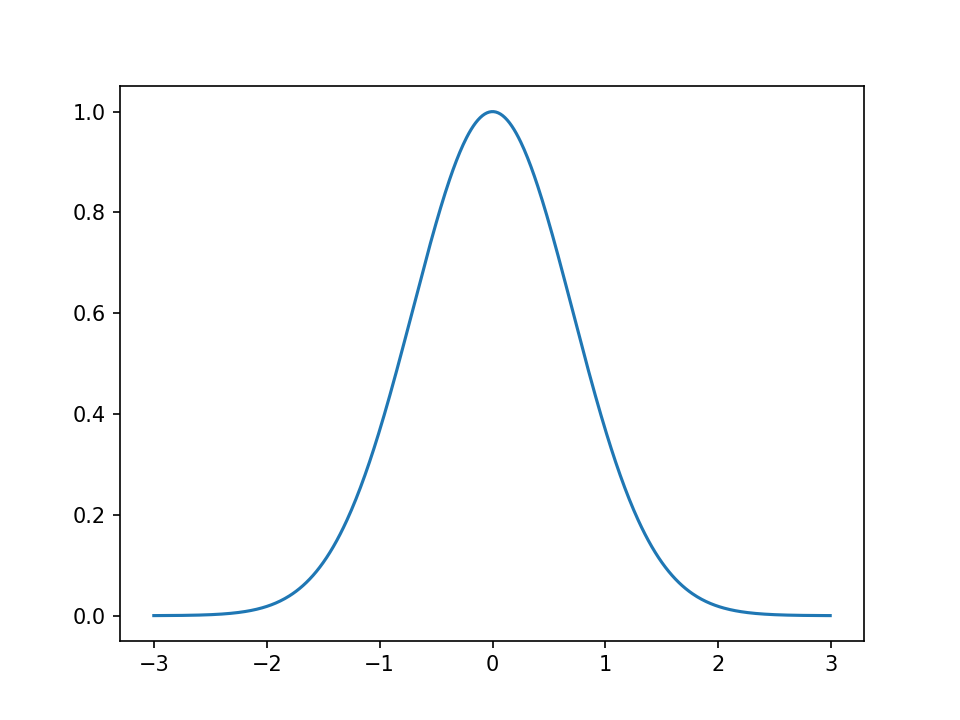

In [ ]:
x=np.arange(-3,3,0.01)
plt.figure('Gaussian function')
plt.plot(x,np.exp(-x**2))
plt.show()

In qualitative terms, since the exponential function is nice and smooth, and the argument is nice and smooth, the Gaussian curve tends to be nice and smooth (and susceptible to calculus) as well.

The Gaussian curve has two major properties that tend to make it useful:

 1. It has the simplest description in terms of probability and statistics. The function is defined completely by mean and variance, and all higher-order terms contribute no information (higher order [cumulants](https://en.wikipedia.org/wiki/Cumulant) are zero).
 2. The *Central Limit Theorem* -- Under a wide range of conditions, any ensemble of a large number of random variables, no matter what their distributions, tends to combine into a random variable with Gaussian distribution. This is also why physicists think it's a theorem, and why mathematicians think it's a natural law, because the ensemble tends to come from real-world applications (think molecules).

Since it is so smooth, it seems like it should be easy to do calculus on. This is why physicists think its a theorem. It's actually pretty difficult to do integration on -- it took quite a bit of cleverness to integrate under the whole curve and there is *no* integration using any combination of elementary functions to integrate between finite bounds.


As with all functions, you can scale the width of the curve by scaling the input -- the graph of the curve $\operatorname f(x/a)$ is wider by a factor of $a$ than the graph of the curve $\operatorname f(x)$. If you do that here, we end up with the following:

$$\begin{eqnarray*}
y&=&\operatorname f(x)&=&e^{-\left(\frac{x}{a}\right)^2} \\
 & & &=&e^{-\frac{x^2}{a^2}}
\end{eqnarray*}$$

If you use $a=\sigma\sqrt{2}$, (which gives $a^2=2\sigma^2$), it is provable that the parameter $\sigma$ matches up with the definition of *standard deviation* of a continuous PDF. If the standard deviation is twice as much, the curve will be twice as wide. With this parameter inserted, we have a more-general Gaussian curve
$y=e^{-\frac{x^2}{2\sigma^2}}$

### Area under the curve

Several applications of the Gaussian need the area under the 1D Gaussian curve, volume under the 2D Gaussian surface, or in general hyper-volume enclosed in the nD Gaussian. These applications include:

* Compute a valid probability density from a Gaussian, where the PDF must integrate to 1 over all of space. As a result, the area under the curve is often known as the *normalization constant* $Z$, because dividing the Gaussian by $Z$ results in a function that integrates to 1.
* Compute the idealized energy in a star image that has been fit by a Gaussian

It takes no small bit of cleverness to come up with the 1D case. From there, it takes slightly less cleverness (but still a lot) to get to the nD case. I'll just present the answer here, without proof.

#### 1D case

$$y=\operatorname f(x)=e^{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$$
$$\begin{eqnarray*}
Z&=&\int_{-\infty}^\infty \operatorname f(x)\, dx \\
 &=&\sqrt{2\pi\sigma^2}
\end{eqnarray*}$$

#### nD case

$$\begin{eqnarray*}
z&=&\operatorname f(\vec{x}) \\
 &=&e^{\left(-\frac{1}{2}(\vec{x}-\bar{x})\T\M{P}^{-1}(\vec{x}-\bar{x})\right)}\\
Z&=&\int_{\mathbb{R}^n}\operatorname f(\vec{x})\,d\vec{x}\\
 &=&\sqrt{\operatorname{det}(2\pi\M{P})} \\
 &=&\sqrt{2^n\pi^n\operatorname{det}(\M{P})} & \mbox{from the property of determinants }\operatorname{det}(a\MM{M}{_{n\times n}})=a^n\operatorname{det}(\MM{M}{_{n\times n}})
 \end{eqnarray*}$$

This actually makes intuitive sense. Matrix $\M{P}$ stands in for variance $\sigma^2$, and we use the determinant to determine the "size" of the matrix, IE how much it scales and squishes (see 3blue1brown on linear algebra determinants). Since the determinant of a scalar is that scalar, this reduces to the 1D case.

### Probability Density of Gaussian random variable
By applying the normalization coefficient and parameters above, we can get the PDF of a Gaussian random variable with any desired mean and covariance:

$$f(\vec{x})=\sqrt{\det(2\pi\M{P})}e^{-\frac{1}{2}(\vec{x}-\bar{x})\T\M{P}^{-1}(\vec{x}-\bar{x})}$$

In [ ]:
def f_gaussian(x,P,xbar=None):
    Z=1/np.sqrt(np.linalg.det(2*np.pi*P))
    xdev=x-xbar if xbar is not None else x
    print("xdev:  ",xdev.shape)
    Pinv=np.linalg.inv(P)
    axes=list(range(len(x.shape)))
    t=axes[-1]
    axes[-1]=axes[-2]
    axes[-2]=t
    print("axes: ",axes)
    xdevt=np.transpose(xdev,axes=axes)
    print("xdevt: ",xdevt.shape)
    print("P**-1: ",np.linalg.inv(P).shape)
    xpo1=xdevt @ np.linalg.inv(P)
    print("xpo1:  ",xpo1.shape)
    xpo2=xpo1 @ xdev
    print("xpo2:  ",xpo2.shape)
    xpo=-1/2*xpo2
    print("xpo:   ",xpo.shape)
    result=Z*np.exp(xpo)
    print("result: ",result.shape)
    return result

x:  (101, 101, 1, 1)
y:  (101, 101, 1, 1)
xy:  (101, 101, 2, 1)
xdev:   (101, 101, 2, 1)
axes:  [0, 1, 3, 2]
xdevt:  (101, 101, 1, 2)
P**-1:  (2, 2)
xpo1:   (101, 101, 1, 2)
xpo2:   (101, 101, 1, 1)
xpo:    (101, 101, 1, 1)
result:  (101, 101, 1, 1)
(101, 101)
0.04798702088783482
0.9850641317058191


<IPython.core.display.Javascript object>


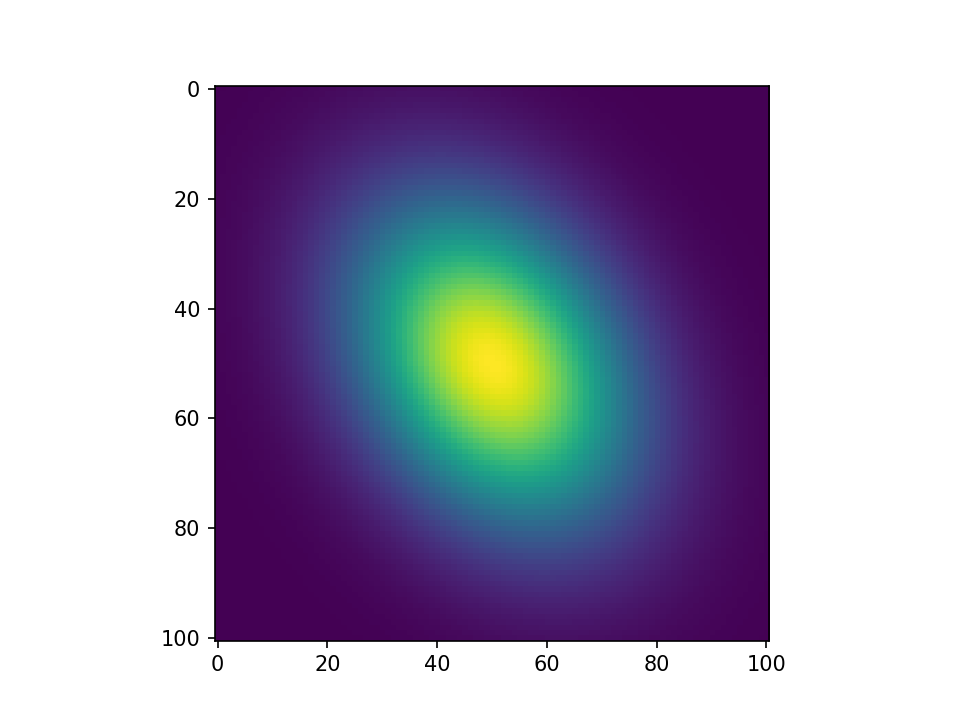

In [ ]:
P=np.array([[3,1],[1,4]])
xbar=np.array([[5],[5]])
(x,y)=np.meshgrid(np.linspace(0,10,101),np.linspace(0,10,101))
x=x.reshape(101,101,1,1)
y=y.reshape(101,101,1,1)
print("x: ",x.shape)
print("y: ",y.shape)
xy=np.concatenate([x,y],axis=2)
print("xy: ",xy.shape)
f=f_gaussian(xy,P,xbar).reshape(101,101)
print(f.shape)
print(np.max(f)) #Peak value of PDF
print(np.sum(f*0.01)) #Approximate integral within box, should be ~1
plt.figure("PDF")
plt.imshow(f,origin='lower')
plt.show()

### Constructing a sample set from a mean and covariance
The following recipe is underived here. It effectively transforms a *Gaussian* vector random variable with zero mean and identity covariance to a Gaussian random variable with the given mean and covariance.

* Generate a sample set with the required number of vectors $N$ with the required number of components $m$, each a sample of a Gaussian normal scalar random variable with zero mean and variance 1. This will create a set of vectors with (approximately) zero vector mean and covariance equal to the $m \times m$ identity matrix. We will consider this to be a matrix $\M{X}$, where each sample is a column vector, therefore the matrix has size $m\times N$.
* Calculate the lower Cholesky decomposition of the covariance matrix $\M{L}=\operatorname{chol}(\M{P})$. You can check by verifying that $\M{L}\M{L}\T=\M{P}$ to sufficient precision
* Use the $\M L$ matrix to transform the set of vectors, giving a set $\M{Y}=\M{L}\M{X}$ with zero mean and the given covariance $\M{P}$.
* Add the mean vector $\bar{x}$ to each column generating a new matrix $\M{Z}$ such that $\vec{Z}_{\operatorname{column}i}=\vec{Y}_{\operatorname{column}i}+\bar{x}$. This $\M{Z}$ is the desired sample, with given mean $\bar{x}$ and covariance about that mean $\M{P}$.

In [ ]:
import numpy.random as nr
from numpy.linalg import cholesky

def pnoise(N,P,xbar=None):
    m=P.shape[0]
    X=nr.randn(m,N)
    L=cholesky(P)
    X=L@X
    if xbar is not None:
        X+=xbar
    return X



### Constructing uncertainty ellipsoids
Often it is educational to draw ellipsoids of one or more "$n$-sigma" surfaces. We can use the same matrix $\M{L}$ from above. This time, the samples will not be taken at random, but will be a circle of radius $n$ and the required dimension. For instance, a 2-element vector random variable will require an $S_1$ (just a normal circle) in 2D space, a 3-element vector an $S_2$ circle (surface of a sphere) in 3D space, a 4-element vector is a $S_3$ (surface of a 4D hypersphere) in 4D space, and in general an $n$-element vector will require a set of samples of distance $n$ from the origin of $n$-space, or a unit-radius $S_{n-1}$.

Code for the 2D case follows. Higher dimensions are harder simply because it is harder to evenly space points on the surface of a sphere or hypersphere.

The unit eigenvectors of $\M{P}$ are the directions of the axes of the ellipsoids. The respective eigenvalues are the square of the axis length.

<IPython.core.display.Javascript object>


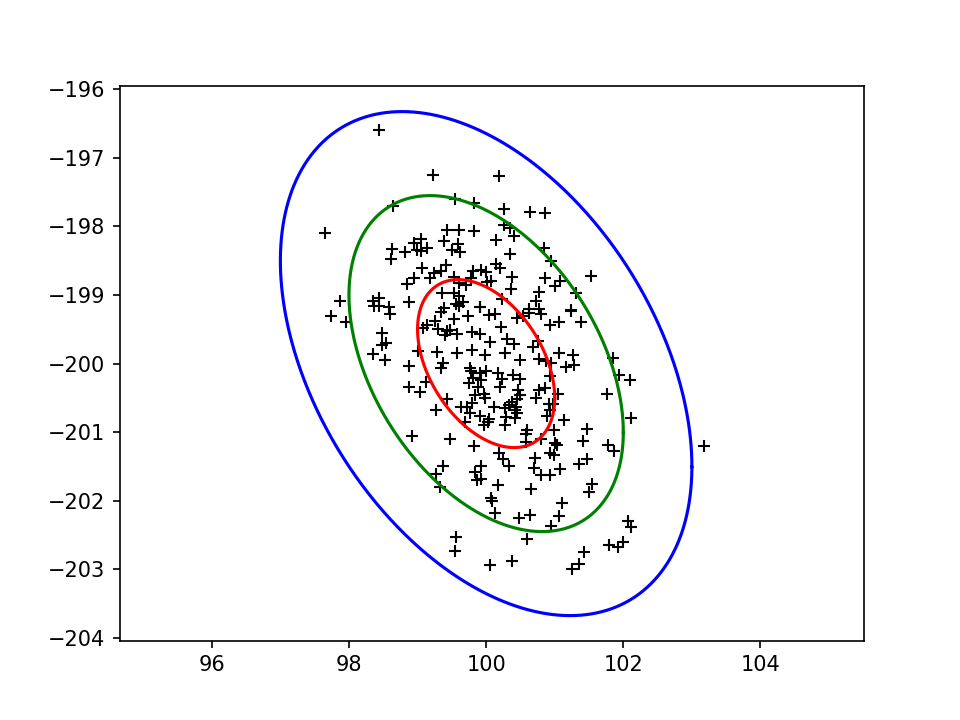

In [ ]:
def pell(n,P,xbar=None):
    q=np.arange(0,2*np.pi,0.01)
    c=np.cos(q)
    s=np.sin(q)
    X=np.array([c,s])*n
    L=cholesky(P)
    X=L@X
    if xbar is not None:
        X+=xbar
    return X

P=np.array([[1,-0.5],[-0.5,1.5]])
xbar=np.array([[100],[-200]])
x=pnoise(250,P,xbar)
e1=pell(1,P,xbar)
e2=pell(2,P,xbar)
e3=pell(3,P,xbar)
plt.figure("Covariance")
plt.plot(x [0,:],x [1,:],'k+')
plt.plot(e1[0,:],e1[1,:],'r-')
plt.plot(e2[0,:],e2[1,:],'g-')
plt.plot(e3[0,:],e3[1,:],'b-')
plt.axis('equal')
plt.show()

### Calculating covariance given a set of samples
The mean is easy, it's just the total of all the vectors divided by the number of vectors:

$$\bar{x}=\frac{1}{N}\sum_{i=1}^N \vec{x}_i$$

The covariance is calculated as:

$$\M{P} = \frac{1}{N-1}\sum_{i=1}^N (\vec{x}_i-\bar{x})(\vec{x}_i-\bar{x})\T$$

Note that this mirrors the definition of covariance:

$$\M{P}=\E((\vec{x}-\E{\vec{x}})(\vec{x}-\E{\vec{x}})\T)$$

We use $\bar{x}$ as our stand-in of $\E{\vec{x}}$. We use each of our samples of $\vec{x}_i$ in order to approximate the true random variable $\vec{x}$, and since we are doing this multiple times, we have to divide by the approximate number of samples. We are using $\frac{1}{N-1}$ for the same reason we use it in a sample standard deviation -- there is one less degree of freedom due to the fact that we have to calculate the mean from the samples as well as the standard deviation.

Alternatively, arranging the observation vectors as the columns of a matrix, so that

$$\M{X} = \begin{bmatrix}\vec{x}_1 & \vec{x}_2 & \dots & \vec{x}_N \end{bmatrix}$$

which is a matrix of $m$ rows and $N$ columns. Then, the sample covariance matrix can be computed as

$$\M{P} = \frac{1}{N-1}\left( \M{F} - \bar{x}\vec{1}\T \right)\left( \M{F} - \bar{x}\vec{1}\T\right)\T$$

where $\vec{1}$ is a column vector with all components 1. This is used to create an $m \times N$ matrix where every column vector is $\bar{x}$. In code we use numpy broadcasting and say:

In [ ]:
def pcalc(X):
    xbar=np.mean(X,1).reshape(-1,1)
    Xac=X - xbar
    N=Xac.shape[1]
    P=(Xac @ Xac.T)/(N-1)
    return (xbar,P)

print(pcalc(x))


(array([[ 100.11971395],
       [-199.99376492]]), array([[ 0.85986371, -0.51793276],
       [-0.51793276,  1.6963239 ]]))


In [ ]:
def gaussZ(P):
    return np.sqrt(np.linalg.det(P))